# Data Mining Lab 1
In this lab session we will focus on the use of scientific computing libraries to efficiently process, transform, and manage data. Furthermore, we will provide best practices and introduce visualization tools for effectively conducting big data analysis and visualization.

---

## Table of Contents
1. Data Source
2. Data Preparation
3. Data Transformation
 - 3.1 Converting Dictionary into Pandas dataframe
 - 3.2 Familiarizing yourself with the Data
4. Data Mining using Pandas
 - 4.1 Dealing with Missing Values
 - 4.2 Dealing with Duplicate Data
5. Data Preprocessing
 - 5.1 Sampling
 - 5.2 Feature Creation
 - 5.3 Feature Subset Selection
 - 5.4 Dimensionality Reduction
 - 5.5 Atrribute Transformation / Aggregation
 - 5.6 Discretization and Binarization
6. Data Exploration
7. Conclusion
8. References

---

## Introduction
In this notebook I will explore a text-based, document-based [dataset](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html) using scientific computing tools such as Pandas and Numpy. In addition, several fundamental Data Mining concepts will be explored and explained in details, ranging from calculating distance measures to computing term frequency vectors. Coding examples, visualizations and demonstrations will be provided where necessary. Furthermore, additional exercises are provided after special topics. These exercises are geared towards testing the proficiency of students and motivate students to explore beyond the techniques covered in the notebook. 

---

### Requirements
Here are the computing and software requirements

#### Computing Resources
- Operating system: Preferably Linux or MacOS
- RAM: 8 GB
- Disk space: Mininium 8 GB

#### Software Requirements
Here is a list of the required programs and libraries necessary for this lab session:

##### Language:
- [Python 3+](https://www.python.org/download/releases/3.0/) (Note: coding will be done strictly on Python 3)
    - We are using Python 3.9.6.
    - You can use newer version, but use at your own risk.
    
##### Environment:
Using an environment is to avoid some library conflict problems. You can refer this [Setup Instructions](http://cs231n.github.io/setup-instructions/) to install and setup.

- [Anaconda](https://www.anaconda.com/download/) (recommended but not required)
    - Install anaconda environment
    
- [Python virtualenv](https://virtualenv.pypa.io/en/stable/userguide/) (recommended to Linux/MacOS user)
    - Install virtual environment

- [Kaggle Kernel](https://www.kaggle.com/kernels/)
    - Run on the cloud  (with some limitations)
    - Reference: [Kaggle Kernels Instructions](https://github.com/omarsar/data_mining_lab/blob/master/kagglekernel.md)
    
##### Necessary Libraries:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install `jupyter` and Use `$jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install `sklearn` latest python library
- [Pandas](http://pandas.pydata.org/)
    - Install `pandas` python library
- [Numpy](http://www.numpy.org/)
    - Install `numpy` python library
- [Matplotlib](https://matplotlib.org/)
    - Install `maplotlib` for python
- [Plotly](https://plot.ly/)
    - Install and signup for `plotly`
- [Seaborn](https://seaborn.pydata.org/)
    - Install and signup for `seaborn`
- [NLTK](http://www.nltk.org/)
    - Install `nltk` library

---

In [1]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

## 1. The Data

If you need more information about the dataset please refer to the reference provided above. Below is a snapshot of the dataset already converted into a table. Keep in mind that the original dataset is not in this nice pretty format. That work is left to us. That is one of the tasks that will be covered in this notebook: how to convert raw data into convenient tabular formats using Pandas. 

The dataset contains a sentence and score label. 

---

## 2. Data Preparation
This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015
Please cite the paper if you want to use it :)

It contains sentences labelled with positive or negative sentiment.

In [70]:
# input the data
train_data = open('C:/Users/zhang/Desktop/DM2022-Lab1-Master-main/DM2022-Lab1-Master-main/sentiment labelled sentences/amazon_cells_labelled.txt','r')
text1 = []
for line in train_data:
    text1.append(line)
print(text1)

['So there is no way for me to plug it in here in the US unless I go by a converter.\t0\n', 'Good case, Excellent value.\t1\n', 'Great for the jawbone.\t1\n', 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!\t0\n', 'The mic is great.\t1\n', 'I have to jiggle the plug to get it to line up right to get decent volume.\t0\n', 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.\t0\n', 'If you are Razr owner...you must have this!\t1\n', 'Needless to say, I wasted my money.\t0\n', 'What a waste of money and time!.\t0\n', 'And the sound quality is great.\t1\n', 'He was very impressed when going from the original battery to the extended battery.\t1\n', 'If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.\t0\n', 'Very good quality though\t1\n', 'The design is very odd, as the ear "clip" is not very comfortable at all.\t0\n', 'Highly recommend

In [71]:
# second data
train_data2 = open('C:/Users/zhang/Desktop/DM2022-Lab1-Master-main/DM2022-Lab1-Master-main/sentiment labelled sentences/imdb_labelled.txt',encoding="utf-8")
text2 = []
for line in train_data2:
    text2.append(line)
print(text2)

['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  \t0\n', 'Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  \t0\n', 'Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  \t0\n', 'Very little music or anything to speak of.  \t0\n', 'The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  \t1\n', "The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  \t0\n", 'Wasted two hours.  \t0\n', 'Saw the movie today and thought it was a good effort, good messages for kids.  \t1\n', 'A bit predictable.  \t0\n', 'Loved the casting of Jimmy Buffet as the science teacher.  \t1\n', 'And those baby owls were adorable.  \t1\n', "The movie showed a lot of Florida at it's best

In [72]:
# third data
train_data3 = open('C:/Users/zhang/Desktop/DM2022-Lab1-Master-main/DM2022-Lab1-Master-main/sentiment labelled sentences/yelp_labelled.txt',encoding="utf-8")
text3 = []
for line in train_data3:
    text3.append(line)
print(text3)

['Wow... Loved this place.\t1\n', 'Crust is not good.\t0\n', 'Not tasty and the texture was just nasty.\t0\n', 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.\t1\n', 'The selection on the menu was great and so were the prices.\t1\n', 'Now I am getting angry and I want my damn pho.\t0\n', "Honeslty it didn't taste THAT fresh.)\t0\n", 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.\t0\n', 'The fries were great too.\t1\n', 'A great touch.\t1\n', 'Service was very prompt.\t1\n', 'Would not go back.\t0\n', 'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.\t0\n', 'I tried the Cape Cod ravoli, chicken,with cranberry...mmmm!\t1\n', 'I was disgusted because I was pretty sure that was human hair.\t0\n', 'I was shocked because no signs indicate cash only.\t0\n', 'Highly recommended.\t1\n', 'Waitress was a little slow in service.\t0\n', 'This 

## 3.TF-IDF Features
tf-idf is a statistical method to assess the importance of a word to a set of files or one of the files in a corpus. The importance of a word increases proportionally to the number of times it appears in the file, but at the same time decreases inversely to the frequency it appears in the corpus.

In [35]:
# create tf function
def tf(term, token_doc):
    tf = token_doc.count(term)/len(token_doc)
    return tf

# create function to calculate how many doc contain the term 
def numDocsContaining(word, token_doclist):
    doccount = 0
    for doc_token in token_doclist:
        if doc_token.count(word) > 0:
            doccount +=1
    return doccount
  
import math
# create function to calculate  Inverse Document Frequency in doclist - this list of all documents
def idf(word, token_doclist):
    n = len(token_doclist)
    df = numDocsContaining(word, token_doclist)
    return math.log10(n/df)

#define a function to do cosine normalization a data dictionary
def cos_norm(dic): # dic is distionary data structure
  import numpy as np
  dic_norm={}
  factor=1.0/np.sqrt(sum([np.square(i) for i in dic.values()]))
  for k in dic:
    dic_norm[k] = dic[k]*factor
  return dic_norm

#create function to calculate normalize tfidf 
def compute_tfidf(token_doc,bag_words_idf):
  tfidf_doc={}
  for word in set(token_doc):
    tfidf_doc[word]= tf(word,token_doc) * bag_words_idf[word]   
  tfidf_norm = cos_norm(tfidf_doc)
  return tfidf_norm

# create normalize term frequency
def tf_norm(token_doc):
  tf_norm={}
  for term in token_doc:
    tf = token_doc.count(term)/len(token_doc)
    tf_norm[term]=tf
  tf_max = max(tf_norm.values())
  for term, value in tf_norm.items():
    tf_norm[term]= 0.5 + 0.5*value/tf_max
  return tf_norm

def compute_tfidf_query(query_token,bag_words_idf):
  tfidf_query={}
  tf_norm_query = tf_norm(query_token)
  for term, value in tf_norm_query.items():
    tfidf_query[term]=value*bag_words_idf[term]   
  return tfidf_query

In [36]:
import re # Import regular Expression Package to deal with term 

def clean_word(word):
  word = word.replace('\"','').replace('\r','').replace('\n','').replace('\t','').replace(' ','')
  word = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]", "",word)
  return word

In [37]:
#download chinese stopwords file at https://raw.githubusercontent.com/stopwords-iso/stopwords-zh/master/stopwords-zh.txt
# and save to your computer, you also add more chinese stopwords
import requests
!pip3 install opencc-python-reimplemented
from opencc import OpenCC
cc = OpenCC('s2t')

url = 'https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big'
r = requests.get(url, allow_redirects=True)

open('dict.txt.big', 'wb').write(r.content)

zh_stopwords_path="dict.txt.big"
zh_stopwords_path = [cc.convert(line.strip()) for line in open(zh_stopwords_path, 'r', encoding='utf-8').readlines()]

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
## Merge chinese stopwords and english stopwords
en_stopwords = stopwords.words('english')
stopwords= zh_stopwords_path + en_stopwords

     -------------------------------------- 484.6/484.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for opencc-python-reimplemented: filename=opencc_python_reimplemented-0.1.6-py2.py3-none-any.whl size=486150 sha256=7ee50e0964e48df9ff567af04b6e5bc9e1e0461cf903cfa568051077f23d5bbe
  Stored in directory: c:\users\zhang\appdata\local\pip\cache\wheels\2d\7b\0c\f33c2b65c8fb4728e744851c4d7dbf0816b9e0f96661449c73
Successfully built opencc-python-reimplemented


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zhang\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [38]:
!pip3 install -U transformers
!pip3 install -U ckip-transformers
from transformers import (
  BertTokenizerFast,
  AutoModel
)

tokenizer = BertTokenizerFast.from_pretrained('bert-base-chinese')
model = AutoModel.from_pretrained('ckiplab/albert-tiny-chinese-ner')


     ---------------------------------------- 5.3/5.3 MB 17.7 MB/s eta 0:00:00
     -------------------------------------- 163.5/163.5 kB 9.6 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 69.8 MB/s eta 0:00:00
     -------------------------------------- 161.8/161.8 MB 7.1 MB/s eta 0:00:00


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

C:\Users\zhang\anaconda3\lib\site-packages\huggingface_hub\file_download.py:123: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\zhang\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Downloading:   0%|          | 0.00/110k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/269k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/624 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.74k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/16.0M [00:00<?, ?B/s]

Some weights of the model checkpoint at ckiplab/albert-tiny-chinese-ner were not used when initializing AlbertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertModel were not initialized from the model checkpoint at ckiplab/albert-tiny-chinese-ner and are newly initialized: ['albert.pooler.weight', 'albert.pooler.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


TypeError: __init__() got an unexpected keyword argument 'level'

In [42]:
# Initialize drivers
from ckip_transformers.nlp import CkipWordSegmenter, CkipPosTagger, CkipNerChunker

ws_driver = CkipWordSegmenter(model="bert-base")
pos_driver = CkipPosTagger(model="bert-base")
ner_driver = CkipNerChunker(model="bert-base")

Downloading:   0%|          | 0.00/804 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/407M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/301 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/110k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.86k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/407M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/301 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/110k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.71k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/407M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/301 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/110k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [39]:
flat_list = list()
def flatten_list(list_of_lists): # This function is iterative function, which means it will call itself iteratively. 
    for item in list_of_lists:
        if type(item) == list:
            flatten_list(item)
        else:
            flat_list.append(item)  
    return flat_list

In [47]:
doc_all_1 = {}
for num in range(1,4):
    chinese_text = open('C:/Users/zhang/Desktop/text' + str(num) + '.txt', encoding="utf-8").read()
    text = [p for p in chinese_text.split('\n') if len(p) != 0]

    #tokens = list(jieba.cut(text))
    tokens  = list(ws_driver(text, use_delim=True, batch_size=256, max_length=128))
    flat_list = list()
    tokens = flatten_list(tokens)

    token_filtered = [clean_word(w) for w in tokens if len(w)>1 and not w in stopwords] # Skip words in stopwords
    doc_all_1[num]=token_filtered

Inference: 100%|█████████████████████████████████████████████████████████████████████████| 4/4 [05:23<00:00, 80.87s/it]


In [48]:
bag_words = []
for doc in doc_all_1.keys():
    bag_words += doc_all_1[doc]

bag_words = set(bag_words)

bag_words_idf = {}
for word in bag_words:
    bag_words_idf[word] = idf(word, doc_all_1.values())

tfidf_dic = {}
for doc in doc_all_1.keys():
    tfidf_dic[doc] = compute_tfidf(doc_all_1[doc], bag_words_idf)
    
tfidf_dic

{1: {'': 0.0,
  'tell': 0.0,
  'mail': 0.006333531181755594,
  'always': 0.0,
  'ifIcouldnt': 0.006333531181755594,
  'multiple': 0.0023375179140133952,
  '0What': 0.0023375179140133952,
  'thingsIneed': 0.006333531181755594,
  'user': 0.0046750358280267905,
  '1Ihighly': 0.006333531181755594,
  'apartment': 0.006333531181755594,
  'smoother1The': 0.006333531181755594,
  'ticking': 0.006333531181755594,
  'portraits': 0.006333531181755594,
  'oth': 0.006333531181755594,
  'then': 0.0,
  'say': 0.0,
  'Chinese': 0.0023375179140133952,
  'freeway': 0.006333531181755594,
  'star': 0.0046750358280267905,
  'Ifound': 0.0,
  'aJabra': 0.006333531181755594,
  'since0': 0.006333531181755594,
  'uscalls': 0.006333531181755594,
  'tooth': 0.006333531181755594,
  'Ihad': 0.009350071656053581,
  'contacting': 0.006333531181755594,
  'flaws': 0.0023375179140133952,
  'auto': 0.006333531181755594,
  'span': 0.0023375179140133952,
  'machine': 0.0023375179140133952,
  'Horrible': 0.002337517914013395

### Sklearn tf-idf

In [108]:
amazon = str(text1)
imdb = str(text2)
yelp = str(text3)

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer(stop_words=None, token_pattern="(?u)\\b\\w+\\b")  
X = vectorizer.fit_transform([amazon,imdb,yelp])
r = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
r

,0,00,1,10,100,11,12,13,15,15g,...,yukon,yum,yummy,yun,z,z500a,zero,zillion,zombie,zombiez
0,0,0,9,4,1,1,1,1,1,1,...,0,0,0,0,0,1,1,0,0,0
1,2,0,7,29,0,0,1,2,1,0,...,0,0,0,1,1,0,0,1,2,1
2,0,1,7,5,2,1,2,0,1,0,...,1,2,4,0,0,0,5,0,0,0


##  Create the tf-idf dataframe

In [49]:
import pandas as pd

tfidf_df = pd.DataFrame(tfidf_dic).transpose()
tfidf_df = tfidf_df.fillna(0)
tfidf_df.head()

,,tell,mail,always,ifIcouldnt,multiple,0What,thingsIneed,user,1Ihighly,...,listed1,perfection,fuzzy,gothere,trips,inflate,Ithou,Host,Ianticipated0And,overpriced0
1,0.0,0.0,0.006334,0.0,0.006334,0.002338,0.002338,0.006334,0.004675,0.006334,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.001776,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.000000,0.0,0.000000,0.005274,0.002637,0.000000,0.000000,0.000000,...,0.007144,0.014289,0.007144,0.007144,0.007144,0.007144,0.007144,0.007144,0.007144,0.007144


## Create the worldcloud

Amazon wordcloud

In [52]:
# find the amazon.txt top 50 word to create the wordcloud
text1_dict = tfidf_dic[1]
text1_top50 = dict(sorted(text1_dict.items(), key = lambda item:item[1],reverse=True)[:50]) #用text1中tfidf最高的50個詞 
text1_top50 = list(text1_top50.keys())
text1_top50

['phone',
 'battery',
 'product',
 'headset',
 'ear',
 'charger',
 'reception',
 'phones',
 'buy',
 'volume',
 'device',
 'fits',
 'bluetooth',
 'cell',
 'unit',
 'Motorola',
 'price',
 'Works',
 'Phone',
 'tware',
 'difficult',
 'headsets',
 'headphones',
 'Battery',
 'tones',
 'service',
 'worked',
 'happy',
 'easy',
 'clarity',
 'buttons',
 'Quality',
 'loud',
 'Verizon',
 'sturdy',
 'purchase',
 'wear',
 'ring',
 'using',
 'Good',
 'camera',
 'keyboard',
 'Does',
 'lightweight',
 'charging',
 'Jabra',
 'poor0',
 'item1',
 'ears',
 'easier']

In [53]:
# Prepared chinese font
!pip3 install wget
import wget
wget.download("https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download","TaipeiSansTCBeta-Regular.ttf")

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=ee9eca5d2f78d62009c4b20598ea80e916756c87e40ca4cb32943610219f039c
  Stored in directory: c:\users\zhang\appdata\local\pip\cache\wheels\04\5f\3e\46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
100% [........................................................................] 20659344 / 20659344

'TaipeiSansTCBeta-Regular.ttf'

In [54]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
seg_list = " ".join(text1_top50)
seg_list

'phone battery product headset ear charger reception phones buy volume device fits bluetooth cell unit Motorola price Works Phone tware difficult headsets headphones Battery tones service worked happy easy clarity buttons Quality loud Verizon sturdy purchase wear ring using Good camera keyboard Does lightweight charging Jabra poor0 item1 ears easier'

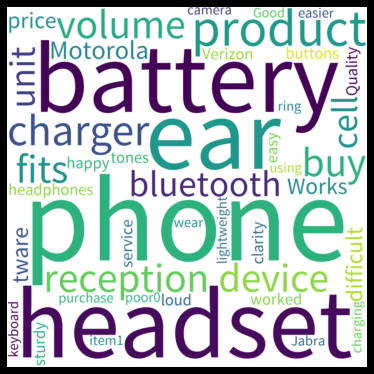

In [55]:
import numpy as np
import matplotlib.pyplot as plt
x, y = np.ogrid[:1500, :1500]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


back_image = ""
import imageio

wc = WordCloud(
    width=1500,
    height=1500,
    background_color='white',               #   Background Color
    max_words=200,                    #   Max words
#    mask=back_image,                       #   Background Image
    max_font_size=None,                   #   Font size
#    font_path="/content/drive/MyDrive/Colab Notebooks/GenJyuuGothic-Bold.ttf",             #   Display font
    font_path="TaipeiSansTCBeta-Regular.ttf",
    random_state=30,                    #   Random color
    prefer_horizontal=0.9)                #   Ratio

wc.generate(seg_list)
plt.figure( figsize=(5,5), facecolor='k') # Output plot size
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wc, interpolation="bilinear")
plt.show()

Imdb wordcloud

In [56]:
# find the imdb.txt top 50 word to create the wordcloud
text2_dict = tfidf_dic[2]
text2_top50 = dict(sorted(text2_dict.items(), key = lambda item:item[1],reverse=True)[:50]) #用text2中tfidf最高的50個詞 
text2_top50 = list(text2_top50.keys())
text2_top50

['movie',
 'film',
 'acting',
 'characters',
 'story',
 'plot',
 'films',
 'watching',
 'script',
 'cast',
 'scenes',
 'actors',
 'character',
 'his',
 'scene',
 'ending',
 'movies',
 'directing',
 'art',
 'dialogue',
 'amovie',
 'actor',
 'subtle',
 'film1',
 'her',
 'drama',
 'predictable',
 'played',
 'lacks',
 'cinematography',
 'action',
 'history',
 'seeing',
 'written',
 'director',
 'memorable',
 'comedy',
 'holes',
 'involved',
 'horror',
 'afilm',
 'game',
 'casting',
 'beautiful',
 'throughout',
 'silent',
 'suspense',
 'w',
 'interesting',
 'writing']

In [57]:
seg_list = " ".join(text2_top50)
seg_list

'movie film acting characters story plot films watching script cast scenes actors character his scene ending movies directing art dialogue amovie actor subtle film1 her drama predictable played lacks cinematography action history seeing written director memorable comedy holes involved horror afilm game casting beautiful throughout silent suspense w interesting writing'

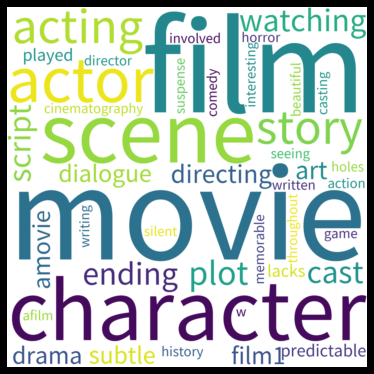

In [58]:
x, y = np.ogrid[:1500, :1500]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


back_image = ""
import imageio

wc = WordCloud(
    width=1500,
    height=1500,
    background_color='white',               #   Background Color
    max_words=200,                    #   Max words
#    mask=back_image,                       #   Background Image
    max_font_size=None,                   #   Font size
#    font_path="/content/drive/MyDrive/Colab Notebooks/GenJyuuGothic-Bold.ttf",             #   Display font
    font_path="TaipeiSansTCBeta-Regular.ttf",
    random_state=30,                    #   Random color
    prefer_horizontal=0.9)                #   Ratio

wc.generate(seg_list)
plt.figure( figsize=(5,5), facecolor='k') # Output plot size
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wc, interpolation="bilinear")
plt.show()

yelb wordcloud

In [59]:
# find the yelb.txt top 50 word to create the wordcloud
text3_dict = tfidf_dic[3]
text3_top50 = dict(sorted(text3_dict.items(), key = lambda item:item[1],reverse=True)[:50]) #用text3中tfidf最高的50個詞 
text3_top50 = list(text3_top50.keys())
text3_top50

['food',
 'restaurant',
 'service',
 'eat',
 'chicken',
 'delicious',
 'Vegas',
 'menu',
 'server',
 'wait',
 'pizza',
 'steak',
 'Food',
 'fries',
 'fresh',
 'sauce',
 'salad',
 'dishes',
 'We',
 'friendly',
 'dining',
 'spicy',
 'sushi',
 'tasty',
 'meat',
 'chips',
 'lunch',
 'selection',
 'flavor',
 'burger',
 'meal',
 'sandwich',
 'cold',
 'breakfast',
 'staff',
 'authentic',
 'dish',
 'potato',
 'atmosphere',
 'attentive',
 'town',
 'dinner',
 'beer',
 'us',
 'portions',
 'rude',
 'tasted',
 'staff1',
 'anytime',
 'waiter']

In [60]:
seg_list = " ".join(text3_top50)
seg_list

'food restaurant service eat chicken delicious Vegas menu server wait pizza steak Food fries fresh sauce salad dishes We friendly dining spicy sushi tasty meat chips lunch selection flavor burger meal sandwich cold breakfast staff authentic dish potato atmosphere attentive town dinner beer us portions rude tasted staff1 anytime waiter'

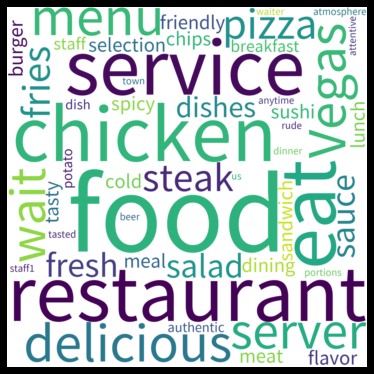

In [61]:
x, y = np.ogrid[:1500, :1500]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


back_image = ""
import imageio

wc = WordCloud(
    width=1500,
    height=1500,
    background_color='white',               #   Background Color
    max_words=200,                    #   Max words
#    mask=back_image,                       #   Background Image
    max_font_size=None,                   #   Font size
#    font_path="/content/drive/MyDrive/Colab Notebooks/GenJyuuGothic-Bold.ttf",             #   Display font
    font_path="TaipeiSansTCBeta-Regular.ttf",
    random_state=30,                    #   Random color
    prefer_horizontal=0.9)                #   Ratio

wc.generate(seg_list)
plt.figure( figsize=(5,5), facecolor='k') # Output plot size
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wc, interpolation="bilinear")
plt.show()

## 4. Naive Bayes classifier

In [111]:
train_data = open('C:/Users/zhang/Desktop/DM2022-Lab1-Master-main/DM2022-Lab1-Master-main/sentiment labelled sentences/amazon_cells_labelled.txt')
text1 = []
for line in train_data:
    text1.append(line)
train_data = open('C:/Users/zhang/Desktop/DM2022-Lab1-Master-main/DM2022-Lab1-Master-main/sentiment labelled sentences/imdb_labelled.txt',encoding='utf-8')
text2 = []
for line in train_data:
    text2.append(line)
train_data = open('C:/Users/zhang/Desktop/DM2022-Lab1-Master-main/DM2022-Lab1-Master-main/sentiment labelled sentences/yelp_labelled.txt',encoding='utf-8')
text3 = []
for line in train_data:
    text3.append(line)
text_data = pd.DataFrame(text1,columns=['text'])
text_data2 = pd.DataFrame(text2,columns=['text'])
text_data3 = pd.DataFrame(text3,columns=['text'])
text_data['score'] = text_data['text'].apply(lambda x:str(x)[-2:-1])
text_data2['score'] = text_data2['text'].apply(lambda x:str(x)[-2:-1])
text_data3['score'] = text_data3['text'].apply(lambda x:str(x)[-2:-1])
train = pd.concat([text_data, text_data2,text_data3], ignore_index=True)
text_data['text'] = text_data['text'].apply(lambda x:x.split('.')[0])
text_data['text'] = text_data['text'] + '.'
text_data2['text'] = text_data2['text'].apply(lambda x:x.split('.')[0])
text_data2['text'] = text_data2['text'] + '.'
text_data3['text'] = text_data3['text'].apply(lambda x:x.split('.')[0])
text_data3['text'] = text_data3['text'] + '.'
train

,text,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.\t1\n",1
2,Great for the jawbone.\t1\n,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.\t1\n,1
...,...,...
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.\t0\n,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0


In [132]:
from sklearn.model_selection import train_test_split
X = train['text']
Y = train['score']
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [133]:
tf_vectorizer = CountVectorizer() # or term frequency

X_tf = tf_vectorizer.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_tf, Y, test_size=0.25)

In [139]:
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, Y_train)

MultinomialNB()

In [143]:
y_pred = naive_bayes_classifier.predict(X_test)
score1 = metrics.accuracy_score(Y_test, y_pred)
score1

0.8266666666666667

In [144]:
tf = TfidfVectorizer()
X_fq = tf.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_tf, Y, test_size=0.25)

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, Y_train)

MultinomialNB()

In [145]:
y_pred = naive_bayes_classifier.predict(X_test)
score2 = metrics.accuracy_score(Y_test, y_pred)
score2

0.8306666666666667

### Comment to comparing
TF-IDF features score : 0.8307

Word frequency features score : 0.8267

In these two way, we can see that using the TfidVectorizer make predict's score more higer. That may because in these three dataset, their review's types are very different. As a result, many word frequency will be 0 and has sparse matric. Therefore, in this case, the tf-idf way score will be higher.

## Fourth part

the ineffcient part:

I consider that seperate the text and score is very ineffient part. Sometime I will just open the txt.file to delete every single score, so that will be a new file only has the text. However, it is very wasting time and ineffient.

improve the preprocessing:

Hence, I use the python function to solve this problem. I use the split funtion to find to score and seperate it. And add the new column in the same dataframe. It not only save the time but also improve the efficient.

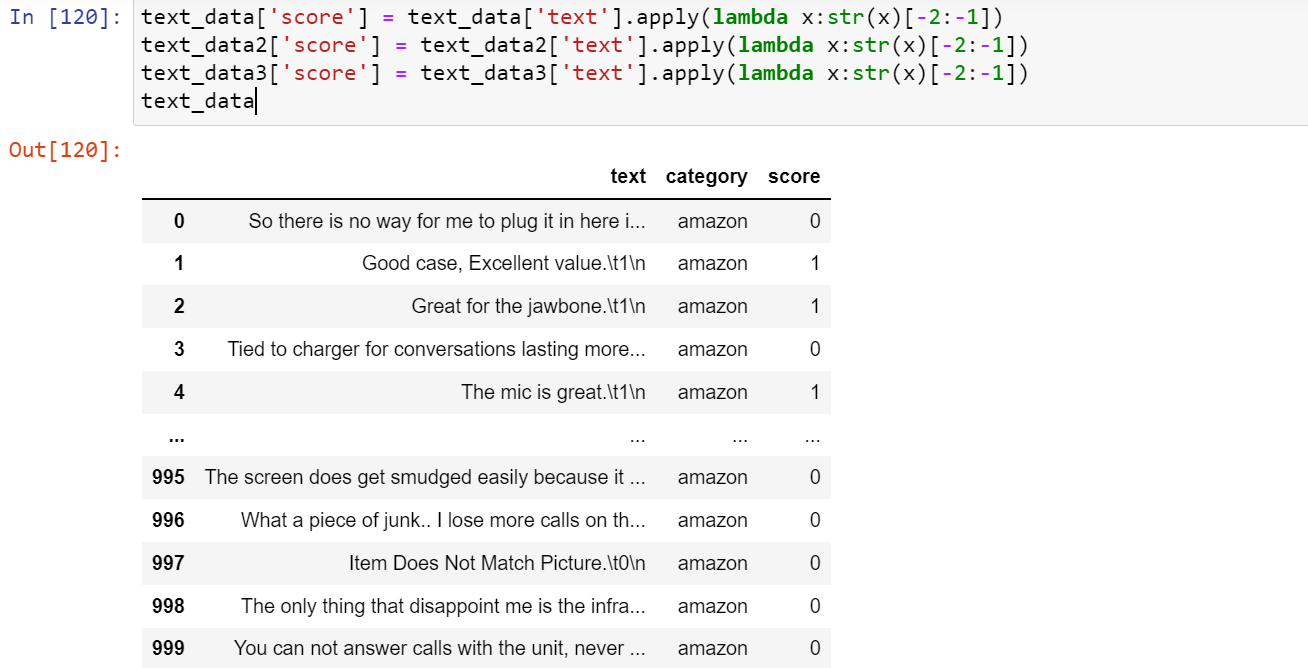